In [1]:
import pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math

from featureEngineering6 import feature_engineering

df=pd.read_csv('../data/train.csv', sep=',')
df_test=pd.read_csv('../data/test.csv', sep=',')

df_d, df_d_test = feature_engineering(df, df_test)

feature1=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_s', 'Title_s', 'Title_Age_s', 'Cabin_s', 'FamilyName']
df[feature1].head()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_s,Title_s,Title_Age_s,Cabin_s,FamilyName
0,0,3,male,22,1,0,7.2500,adult,Mr,adult,X,Braund
1,1,1,female,38,1,0,71.2833,adult,Mrs,adult,M,Cumings
2,1,3,female,26,0,0,7.9250,adult,Miss,young,X,Heikkinen
3,1,1,female,35,1,0,53.1000,adult,Mrs,adult,M,Futrelle
4,0,3,male,35,0,0,8.0500,adult,Mr,adult,X,Allen


In [2]:
feature2= ['Pclass', 'Fare_b', 'FamilySize',
           'Sex_female', 'Sex_male',
           'Age_s_young', 'Age_s_adult', 'Age_s_elder', 
          'Title_Age_s_young','Title_Age_s_adult','Title_Age_s_elder',]



print df_d.columns


Index([u'Age', u'HasAge', u'Pclass', u'Fare_', u'Fare_b', u'HasFamily',
       u'SibSp', u'Parch', u'FamilySize', u'FamilySurvived', u'FamilyDied',
       u'Age_s_adult', u'Age_s_elder', u'Age_s_young', u'Sex_female',
       u'Sex_male', u'Title_s_Master', u'Title_s_Miss', u'Title_s_Mr',
       u'Title_s_Mrs', u'Title_Age_s_adult', u'Title_Age_s_elder',
       u'Title_Age_s_young', u'Embarked__C', u'Embarked__Q', u'Embarked__S',
       u'Cabin_s_G', u'Cabin_s_M', u'Cabin_s_X'],
      dtype='object')


In [3]:
df_d_ = df_d[feature2]
df_d_test_ = df_d_test[feature2]
df_d_[feature2].head()

,Pclass,Fare_b,FamilySize,Sex_female,Sex_male,Age_s_young,Age_s_adult,Age_s_elder,Title_Age_s_young,Title_Age_s_adult,Title_Age_s_elder
0,3,1,1,0,1,0,1,0,0,1,0
1,1,5,1,1,0,0,1,0,0,1,0
2,3,2,0,1,0,0,1,0,1,0,0
3,1,4,1,1,0,0,1,0,0,1,0
4,3,2,0,0,1,0,1,0,0,1,0


In [4]:
df_d_.describe()

,Pclass,Fare_b,FamilySize,Sex_female,Sex_male,Age_s_young,Age_s_adult,Age_s_elder,Title_Age_s_young,Title_Age_s_adult,Title_Age_s_elder
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,2.849607,0.904602,0.352413,0.647587,0.157127,0.674523,0.168350,0.251403,0.740741,0.007856
std,0.836071,1.447915,1.613459,0.477990,0.477990,0.364125,0.468816,0.374387,0.434063,0.438474,0.088337
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,6.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.cross_validation import train_test_split

X, y = df_d_, df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
from sklearn.grid_search import GridSearchCV

pipe = Pipeline([
        #('scaler', StandardScaler()),
        #('pca', KernelPCA(kernel='rbf')),
        #('clf', LogisticRegression(random_state=1, class_weight={0:0.35, 1:0.65}))
        #('clf', KNeighborsClassifier())
        ('clf', RandomForestClassifier(n_estimators=1000,
                                       criterion='entropy',
                                       random_state=1,
                                       #min_samples_split=1, 
                                       #min_samples_leaf=1,
                                       max_features='auto',
                                       bootstrap=True,
                                       oob_score=True,
                                       #max_depth=4,
                                       #max_features=4,
                                       #class_weight={0:0.2, 1:0.8},
                                       n_jobs=-1))
    ])


bootstrap_range = [True]
clf_max_features_range = [ 8]
clf_max_depth_range = [ 3, 4]
clf_min_samples_leaf_range = [2]
clf_min_samples_split_range = [2]


param_grid = [
    {
        'clf__bootstrap': bootstrap_range,
        #'clf__max_features': clf_max_features_range,
        'clf__max_depth': clf_max_depth_range,
        'clf__min_samples_leaf': clf_min_samples_leaf_range,
        'clf__min_samples_split' : clf_min_samples_split_range 
    }
]

gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  #verbose=3,
                  n_jobs=-1)



In [ ]:
gs = gs.fit(X_train, y_train)

print gs.best_score_

print gs.best_params_

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gs.best_estimator_.fit(X_train, y_train)

In [ ]:
print( 'Training Acc: %.3f' % accuracy_score(gs.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(gs.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(gs.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(gs.predict(X_train), y_train))

In [ ]:
print( 'Test Acc: %.3f' % accuracy_score(gs.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(gs.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(gs.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(gs.predict(X_test), y_test))

In [ ]:
scores = cross_validation.cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=10, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
scores = cross_validation.cross_val_score(gs.best_estimator_, X, y, scoring='f1', cv=10, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
from plot_learning_curve import plot_learning_curve

plot_learning_curve(gs.best_estimator_, 'title', X, y, ylim=(0.6, 0.9), cv=10,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

In [ ]:
from plot_learning_curve import plot_learning_curve

plot_learning_curve(gs.best_estimator_, 'title', X, y, ylim=(0.6, 0.9), cv=10,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

## More feature

0.832865168539
{'clf__bootstrap': True, 'clf__max_depth': 4, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Training Acc: 0.853
Training Precision: 0.717
Training Recall: 0.869
Training F1: 0.786
Test Acc: 0.782
Test Precision: 0.589
Test Recall: 0.827
Test F1: 0.688
Cross validation check for Acc: 0.829 +/- 0.022
Cross validation check for F1: 0.762 +/- 0.043


<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

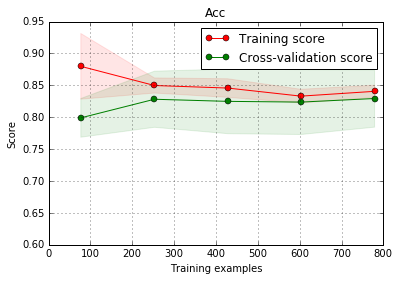

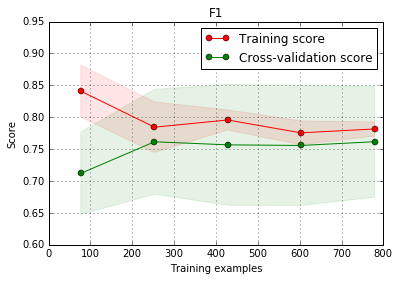

In [27]:

feature3= ['Pclass', 'Fare_b', 'FamilySize',
           'Sex_female', 'Sex_male',
           'Age_s_young', 'Age_s_adult', 'Age_s_elder', 
          'Title_Age_s_young','Title_Age_s_adult','Title_Age_s_elder',
          'Embarked__C', 'Embarked__Q', 'Embarked__S', 
          'Cabin_s_G', 'Cabin_s_M', 'Cabin_s_X',]


df_d_ = df_d[feature3]
df_d_test_ = df_d_test[feature3]

X, y = df_d_.iloc[:].values, df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

gs = gs.fit(X_train, y_train)

print gs.best_score_

print gs.best_params_

print( 'Training Acc: %.3f' % accuracy_score(gs.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(gs.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(gs.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(gs.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(gs.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(gs.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(gs.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(gs.predict(X_test), y_test))

scores = cross_validation.cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(gs.best_estimator_, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

from plot_learning_curve import plot_learning_curve

plot_learning_curve(gs.best_estimator_, 'Acc', X, y, ylim=(0.6, 0.95), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='accuracy')
plot_learning_curve(gs.best_estimator_, 'F1', X, y, ylim=(0.6, 0.95), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='f1')

## Less but better feature

0.886235955056
{'clf__bootstrap': True, 'clf__max_depth': 4, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Training Acc: 0.890
Training Precision: 0.807
Training Recall: 0.893
Training F1: 0.848
Test Acc: 0.855
Test Precision: 0.740
Test Recall: 0.885
Test F1: 0.806
Cross validation check for Acc: 0.883 +/- 0.017
Cross validation check for F1: 0.839 +/- 0.025


<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

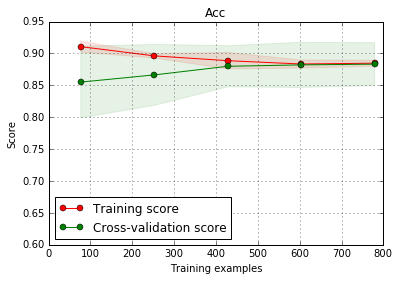

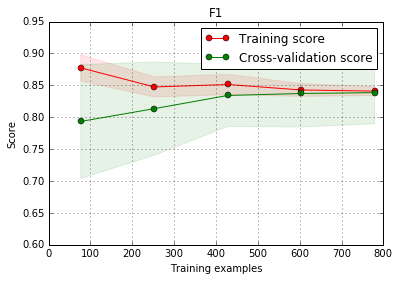

In [24]:
feature4= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]

df_d_ = df_d[feature4]
df_d_test_ = df_d_test[feature4]

X, y = df_d_, df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

gs = gs.fit(X_train, y_train)

print gs.best_score_

print gs.best_params_

print( 'Training Acc: %.3f' % accuracy_score(gs.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(gs.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(gs.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(gs.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(gs.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(gs.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(gs.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(gs.predict(X_test), y_test))


scores = cross_validation.cross_val_score(gs.best_estimator_, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(gs.best_estimator_, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

from plot_learning_curve import plot_learning_curve

plot_learning_curve(gs.best_estimator_, 'Acc', X, y, ylim=(0.6, 0.95), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='accuracy')
plot_learning_curve(gs.best_estimator_, 'F1', X, y, ylim=(0.6, 0.95), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='f1')

In [26]:
gs.best_estimator_

Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False))])

### Sanity check:

Training Acc: 0.885
Training Precision: 0.792
Training Recall: 0.891
Training F1: 0.839
Test Acc: 0.849
Test Precision: 0.726
Test Recall: 0.883
Test F1: 0.797
Cross validation check for Acc: 0.874 +/- 0.023
Cross validation check for F1: 0.824 +/- 0.038


<module 'matplotlib.pyplot' from '/Users/fuyangliu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

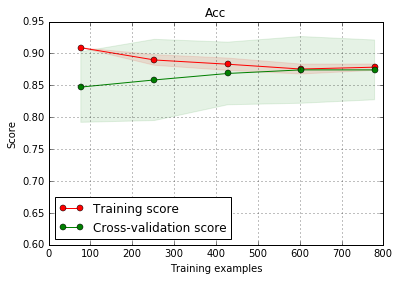

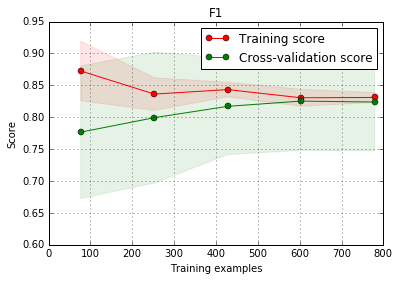

In [25]:
feature4= ['Pclass','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]

df_d_ = df_d[feature4]
df_d_test_ = df_d_test[feature4]

X, y = df_d_, df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = RandomForestClassifier(n_estimators=1000,
                                       criterion='gini',
                                       random_state=1,
                                       min_samples_split=2, 
                                       min_samples_leaf=2,
                                       max_features='auto',
                                       bootstrap=True,
                                       oob_score=True,
                                       max_depth=3,
                                       #class_weight={0:0.2, 1:0.8},
                                       n_jobs=-1)

clf = clf.fit(X_train, y_train)

print( 'Training Acc: %.3f' % accuracy_score(clf.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(clf.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(clf.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(clf.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(clf.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(clf.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(clf.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(clf.predict(X_test), y_test))


scores = cross_validation.cross_val_score(clf, X, y, scoring='accuracy', cv=8, n_jobs=-1)
print('Cross validation check for Acc: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

scores = cross_validation.cross_val_score(clf, X, y, scoring='f1', cv=8, n_jobs=-1)
print('Cross validation check for F1: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

from plot_learning_curve import plot_learning_curve

plot_learning_curve(clf, 'Acc', X, y, ylim=(0.6, 0.95), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='accuracy')
plot_learning_curve(clf, 'F1', X, y, ylim=(0.6, 0.95), cv=8,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='f1')

## All possible feature

In [ ]:
feature5= ['Pclass', 'Fare_b', 'FamilySize', 'FamilySurvived', 'FamilyDied',
           'Sex_female', 'Sex_male',
           'Age_s_young', 'Age_s_adult', 'Age_s_elder', 
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          'Title_Age_s_young','Title_Age_s_adult','Title_Age_s_elder',
          'Embarked__C', 'Embarked__Q', 'Embarked__S', 
          'Cabin_s_G', 'Cabin_s_M', 'Cabin_s_X',]

df_d_ = df_d[feature5]
df_d_test_ = df_d_test[feature5]

X, y = df_d_.iloc[:].values, df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

gs = gs.fit(X_train, y_train)

print gs.best_score_

print gs.best_params_

print( 'Training Acc: %.3f' % accuracy_score(gs.predict(X_train), y_train))
print( 'Training Precision: %.3f' % precision_score(gs.predict(X_train), y_train))
print( 'Training Recall: %.3f' % recall_score(gs.predict(X_train), y_train))
print( 'Training F1: %.3f' % f1_score(gs.predict(X_train), y_train))

print( 'Test Acc: %.3f' % accuracy_score(gs.predict(X_test), y_test))
print( 'Test Precision: %.3f' % precision_score(gs.predict(X_test), y_test))
print( 'Test Recall: %.3f' % recall_score(gs.predict(X_test), y_test))
print( 'Test F1: %.3f' % f1_score(gs.predict(X_test), y_test))

from plot_learning_curve import plot_learning_curve

plot_learning_curve(gs.best_estimator_, 'accuracy', X, y, ylim=(0.6, 0.95), cv=10,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='accuracy')
plot_learning_curve(gs.best_estimator_, 'F1', X, y, ylim=(0.6, 0.95), cv=10,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),scoring='f1')

## Over fitting above, use feature4 instead

## Get the best model

In [ ]:
feature4= ['Pclass', 'Fare_b', 'FamilySurvived', 'FamilyDied',
           'Age_s_young', 'Age_s_adult', 'Age_s_elder',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
          ]

df_d_ = df_d[feature4]
df_d_test_ = df_d_test[feature4]
X, y = df_d_.iloc[:].values, df['Survived'].values

gs = gs.fit(X, y)

print gs.best_score_

print gs.best_params_

In [ ]:
plot_learning_curve(gs.best_estimator_, 'Acc', X, y, ylim=(0.6, 0.95), cv=10,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')
plot_learning_curve(gs.best_estimator_, 'F1', X, y, ylim=(0.6, 0.95), cv=10,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1')

# Model prediction on Kaggle test

In [ ]:
feature4= ['Pclass','FamilySize','FamilySurvived', 'FamilyDied',
           'Title_s_Master', 'Title_s_Miss', 'Title_s_Mr', 'Title_s_Mrs',
           'Cabin_s_G', 'Cabin_s_M', 'Cabin_s_X',
          ]

df_d_ = df_d[feature4]
df_d_test_ = df_d_test[feature4]
X, y = df_d_.iloc[:].values, df['Survived'].values
X_to_predict = df_d_test_.iloc[:].values

clf = gs.best_estimator_
#clf.fit(X, y)


In [ ]:
df_d_test_.head()

In [ ]:
clf = gs.best_estimator_
df_test['Survived'] = clf.predict(X_to_predict)
plt.hist(df_test['Survived'] )

In [ ]:
df_test

In [ ]:
import csv as csv
predictions_file = open("RandomForest_Feature4.csv", "wb")
predictions_file_object = csv.writer(predictions_file)
predictions_file_object.writerow(["PassengerId", "Survived"]) # write the column headers
#for index, row in df_test.iterrows():  # For each row in test file
predictions_file_object.writerows(zip(df_test['PassengerId'], df_test['Survived'])) # write the PassengerId, and predict 1
predictions_file.close()

In [ ]:
x = ['foo', 'bar', 'foo']
x = np.array(x)

In [ ]:
(x == ['foo']).sum()

In [ ]:
plt.hist(df['Survived'] )

In [ ]:
plt.hist(clf.predict(X))